* Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

* Preprocessing the data

In [2]:
from sklearn.preprocessing import MinMaxScaler

* Calling the ML

In [3]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostRegressor

* Using metrics

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

* Importing the dataset

In [5]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Checking the shape of the dataset

In [6]:
df.shape

(1460, 81)

* Dataframe Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* Using Correlation Matrix

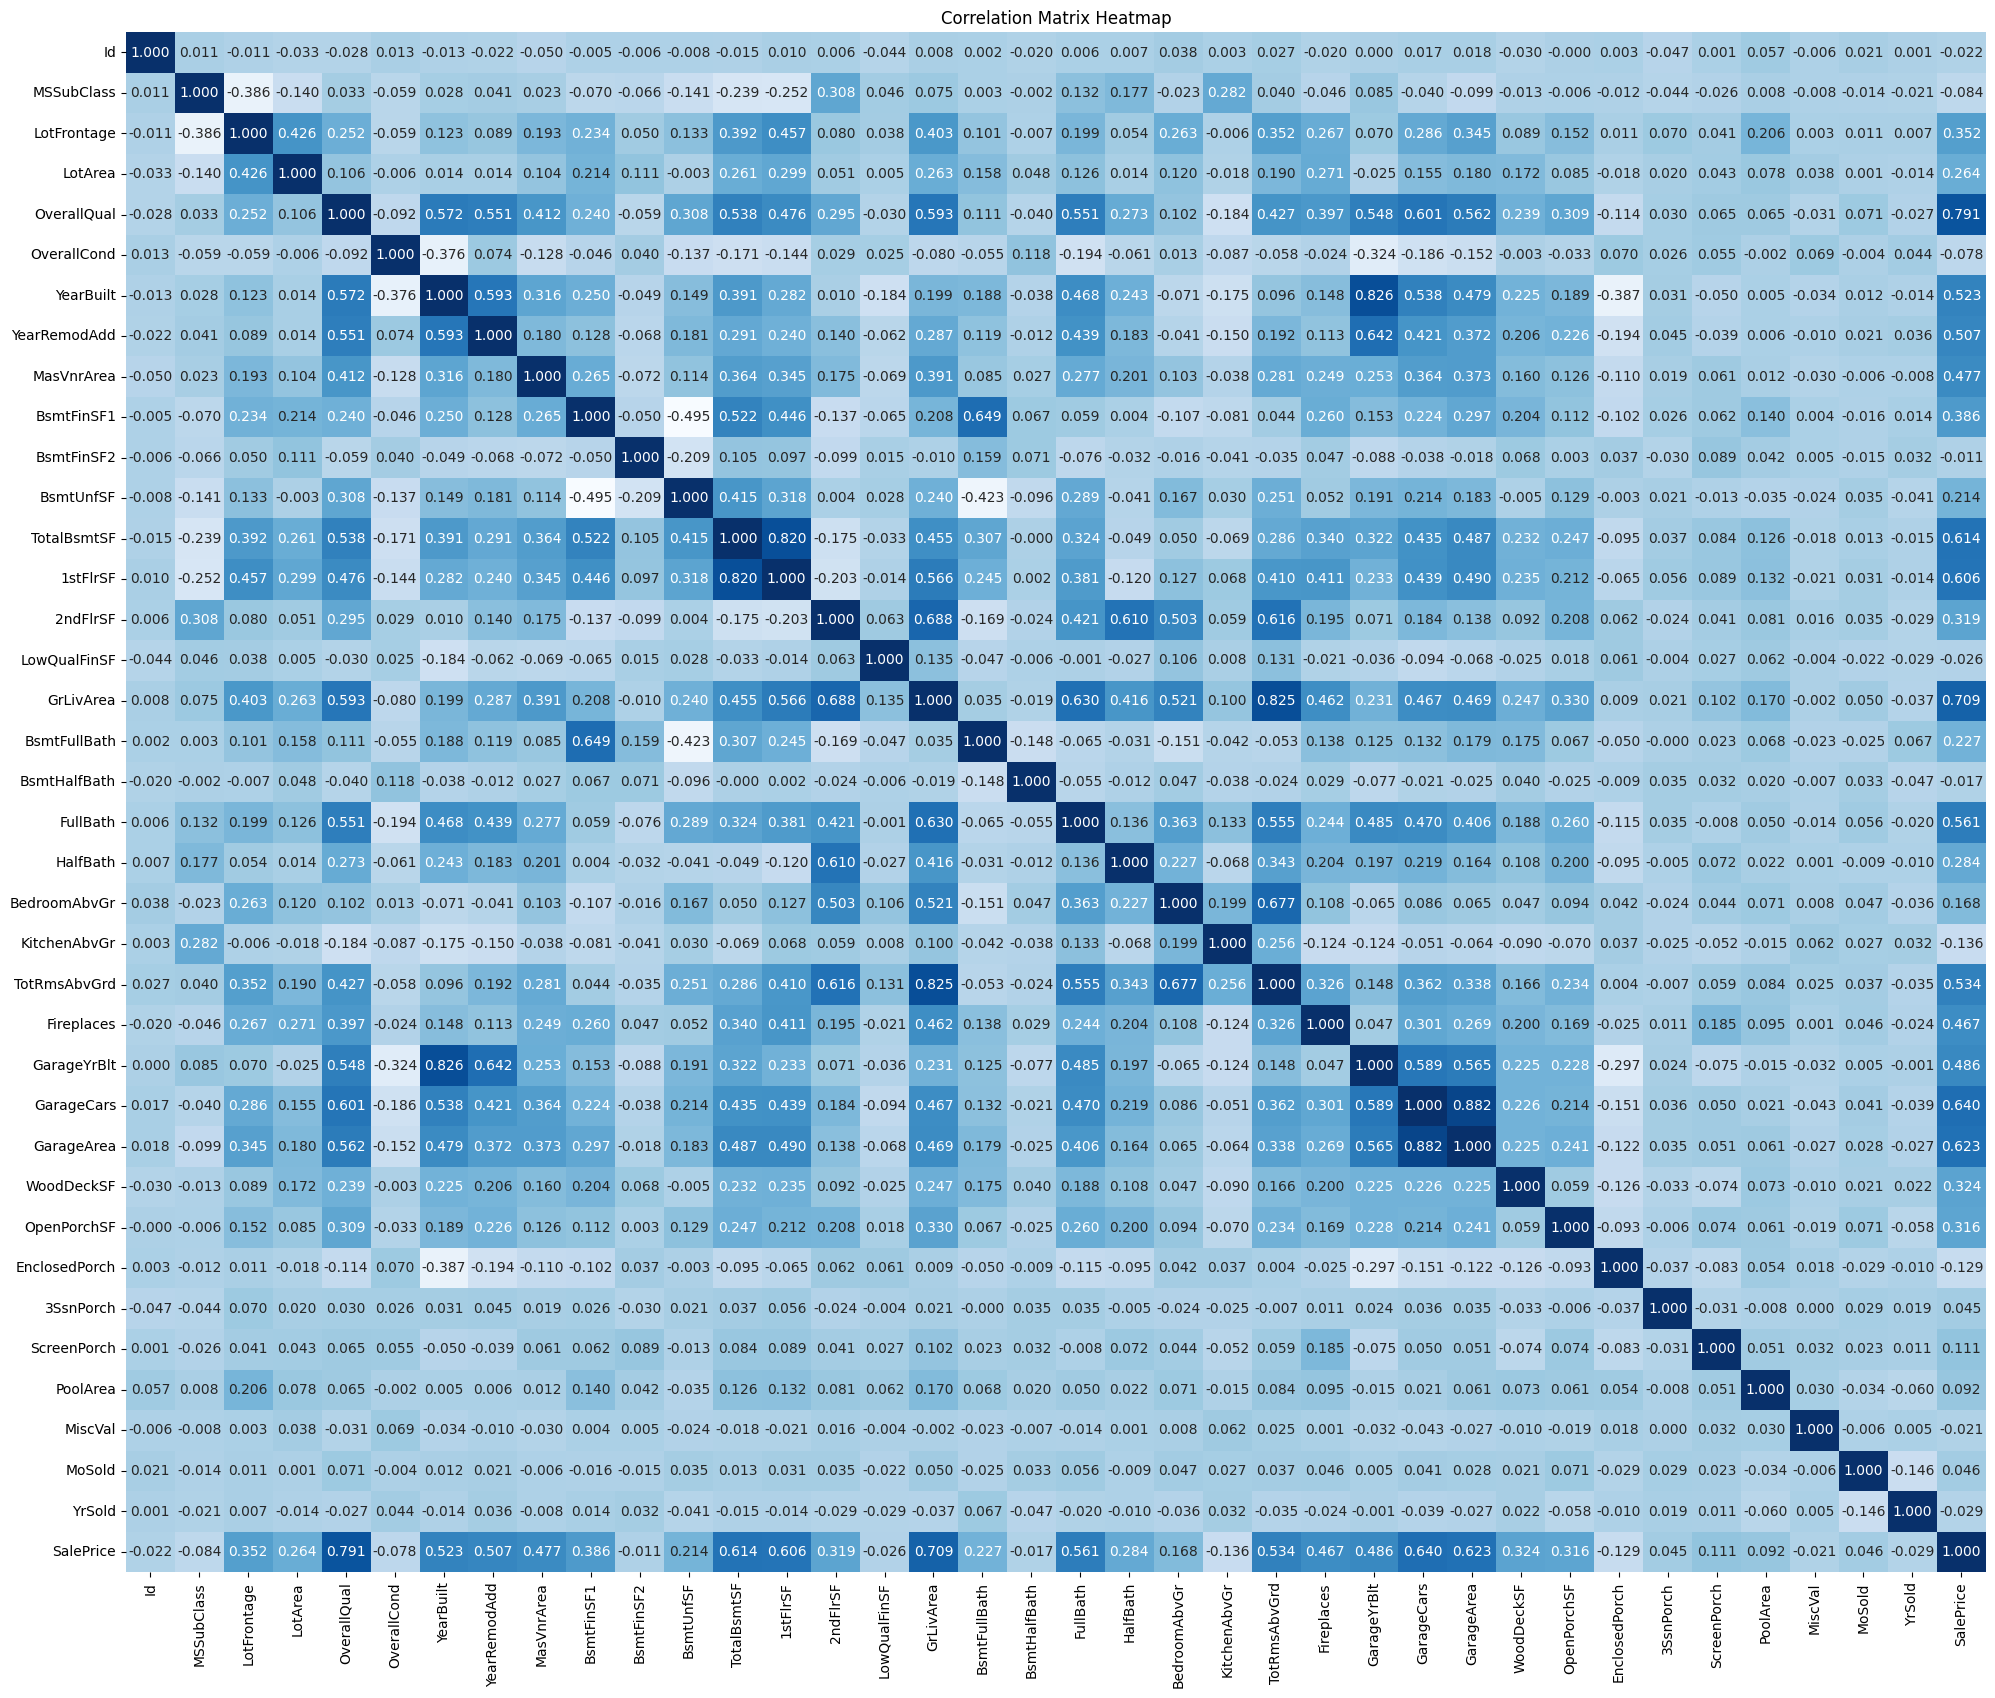

In [8]:
cols_cor = [col for col in df.columns if df[col].dtype !='object']

correlation_matrix = df[cols_cor].corr()
plt.figure(figsize=(24, 20))

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".3f", cbar=False)
plt.title('Correlation Matrix Heatmap')

plt.show()

* Finding the missing values

In [9]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

* Removing the columns with missing values more than 60%

In [10]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

* Columns with under 10% missing values

In [11]:
cols_10 = [col for col in df.columns if (df[col].isnull().sum()/len(df)*100)<10 and ((df[col].isnull().sum()/len(df)*100)>0)]

* Numerical columns

In [12]:
num_missing = [col for col in cols_10 if df[col].dtype != 'object']

* Categorical Columns

In [13]:
cat_missing = [col for col in cols_10 if df[col].dtype == 'object']

* Checking the dtypes of col_10

In [14]:
for col in cols_10:
    print(col, df[col].dtype)

MasVnrArea float64
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Electrical object
GarageType object
GarageYrBlt float64
GarageFinish object
GarageQual object
GarageCond object


* Data Distribution in columns with missing values

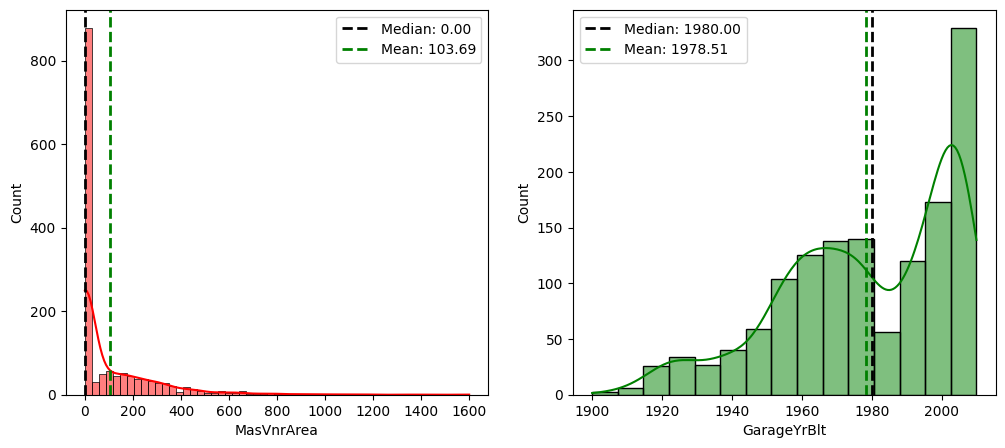

In [15]:
plt.figure(figsize=(12, 5))

colors = ['red', 'green']
plt.title("Data Distribution of Categorical Columns With Missing Values")
for i, col in enumerate(num_missing):
    plt.subplot(1, 2, i+1)
    sns.histplot(x = df[col], color = colors[i], kde=True)
    # Calculate median and mean
    median_val = df[col].median()
    mean_val = df[col].mean()
    
    # Plot median line
    plt.axvline(median_val, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Plot mean line
    plt.axvline(mean_val, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')

    # Add legend
    plt.legend()

plt.show()

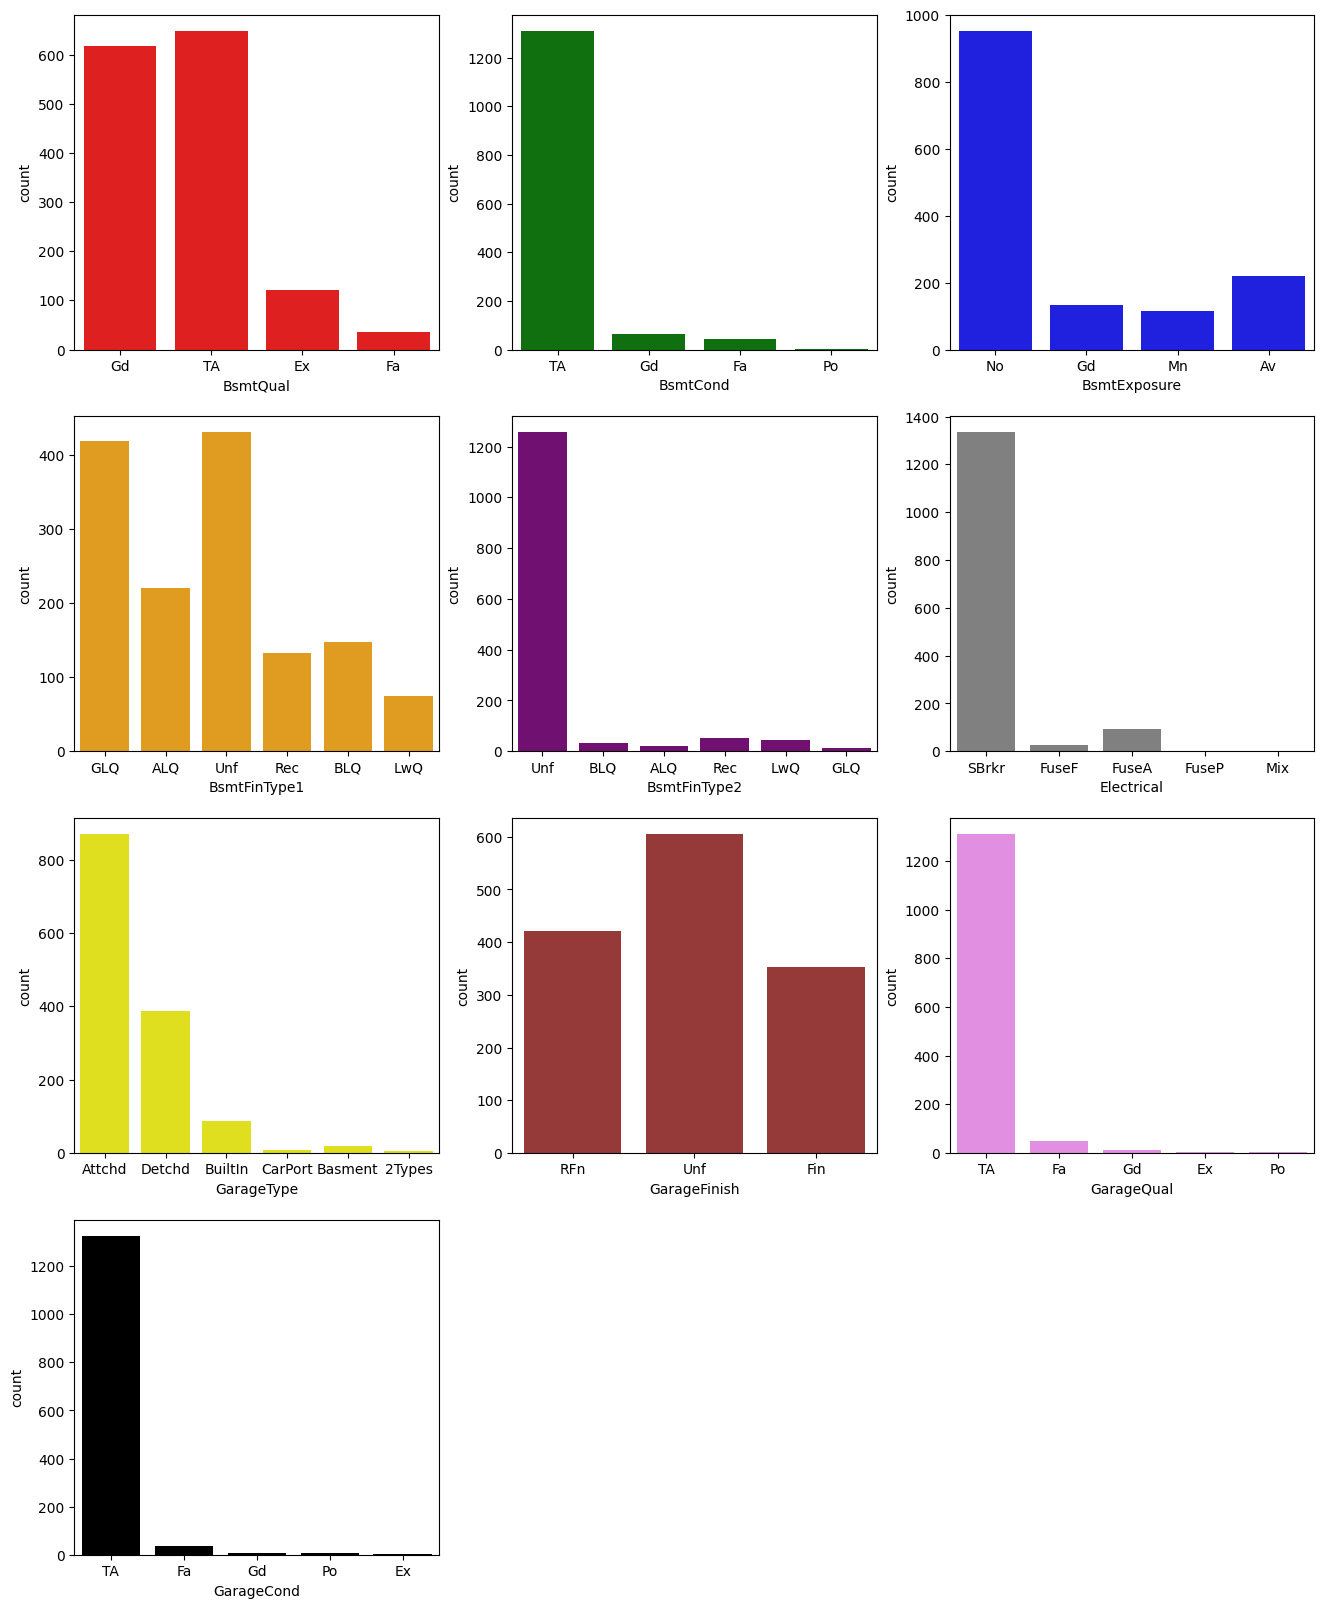

In [16]:
plt.figure(figsize=(16, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'grey', 'yellow', 'brown', 'violet', 'black']
plt.title("Data Distribution of Categorical Columns with Missing Values")
for i, col in enumerate(cat_missing):
    plt.subplot(4, 3, i+1)
    sns.countplot(x = df[col], color = colors[i])
plt.show()

In [17]:
# Lets impute missing values 

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer


imputer_object = SimpleImputer(strategy='most_frequent') 
imputer_num = IterativeImputer(estimator=RandomForestRegressor())

for col in cols_10:
    if df[col].dtype != 'object':
        df[col] = imputer_num.fit_transform(df[[col]])
    else:
        df[col] = imputer_object.fit_transform(df[[col]]).squeeze()

In [18]:
# Lets see if we have any missing values
for col in cols_10:
    print(col,(df[col].isnull().sum() / len(df) * 100))

MasVnrArea 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinType2 0.0
Electrical 0.0
GarageType 0.0
GarageYrBlt 0.0
GarageFinish 0.0
GarageQual 0.0
GarageCond 0.0


In [19]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
Id                0.000000
BedroomAbvGr      0.000000
Fireplaces        0.000000
Functional        0.000000
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
HalfBath          0.000000
GarageYrBlt       0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
1stFlrSF          0.000000
GarageType        0.000000
GarageFinish      0.000000
CentralAir        0.000000
GarageCars        0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
PavedDrive        0.000000
GarageCond        0.000000
GarageQual        0.000000
G

Imputing Columns wih High Percentage of Missing Values

In [20]:
cols_with_high_missing = ['MasVnrType', 'FireplaceQu', 'LotFrontage']

for col in cols_with_high_missing:
    print(df[col].unique())

['BrkFace' nan 'Stone' 'BrkCmn']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


Using machine learning algorithms to impute the missing values

In [21]:
df_clean = df.dropna()
df_missing = df[df.isna().any(axis=1)]

df_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
11,12,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,0,7,2006,New,Partial,345000
13,14,20,RL,91.0,10652,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,0,8,2007,New,Partial,279500


Training the model for object variables

In [22]:
def predictions(target, drop_c):
    X = df_clean.drop(drop_c, axis = 1)
    y = df_clean[target]

    le = LabelEncoder()
    scaler = MinMaxScaler()

    for col in X.columns:
        if X[col].dtype != 'object':
            X[col] = le.fit_transform(X[[col]])
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])

    model = RandomForestClassifier()

    model.fit(X, y)
    
    # Perform k-fold cross-validation with k=6
    kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    print("Scores for each fold:", scores)
    print("Mean score:", scores.mean())

    # Plot the results
    plt.figure(figsize=(8,6))
    plt.plot(range(1,7), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
    plt.title('K-Fold Cross-Validation Results')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.0])
    plt.show()

    return model

Scores for each fold: [0.8627451  0.74509804 0.80392157 0.92156863 0.82352941 0.9       ]
Mean score: 0.84281045751634


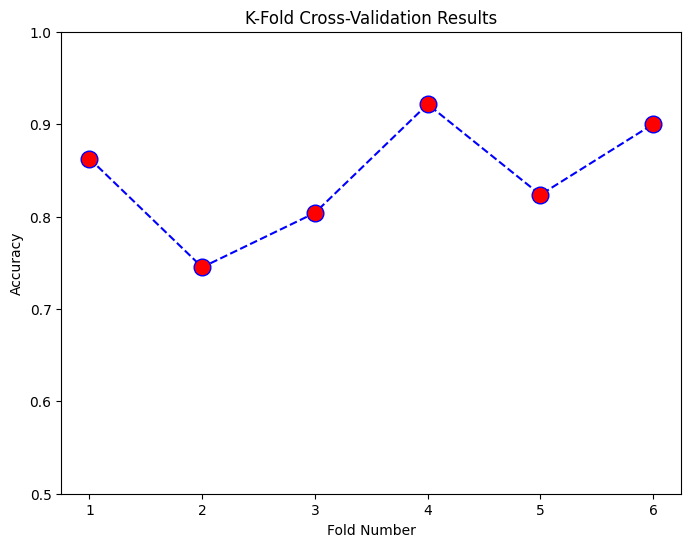

In [23]:
model_MasVnrType = predictions('MasVnrType', ['MasVnrType', 'FireplaceQu', 'LotFrontage', 'SalePrice'])

Scores for each fold: [0.70588235 0.80392157 0.78431373 0.78431373 0.76470588 0.84      ]
Mean score: 0.7805228758169934


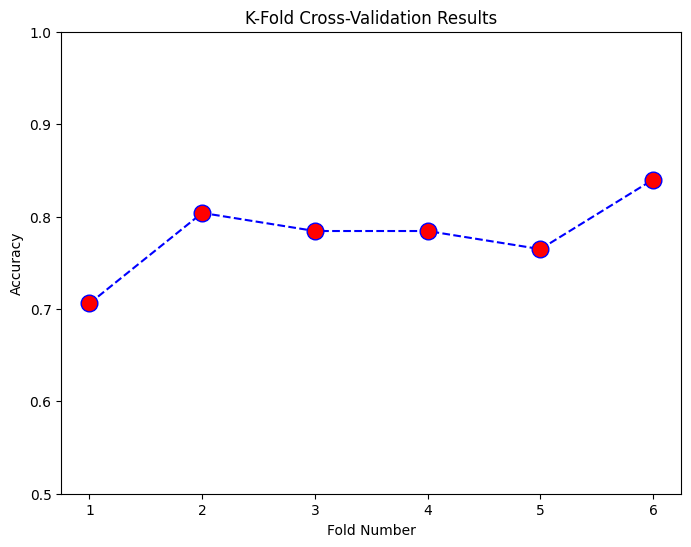

In [24]:
model_FireplaceQu = predictions('FireplaceQu', ['MasVnrType', 'FireplaceQu', 'LotFrontage', 'SalePrice'])

In [25]:
scaler = MinMaxScaler()
def predictions_num(target, drop_c):
    X = df_clean.drop(drop_c, axis = 1)
    y = df_clean[target]

    le = LabelEncoder()

    for col in X.columns:
        if X[col].dtype != 'object':
            X[col] = scaler.fit_transform(X[[col]])
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])

    model = RandomForestRegressor()
    model.fit(X, y)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    print("Scores for each fold:", scores)
    print("Mean score:", scores.mean())

    # Plot the results
    plt.figure(figsize=(8,6))
    plt.plot(range(1,6), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
    plt.title('K-Fold Cross-Validation Results')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.ylim([0.1, 1.0])
    plt.show()

    return model

Scores for each fold: [0.40259001 0.64518784 0.23896108 0.5703093  0.28968604]
Mean score: 0.4293468540763394


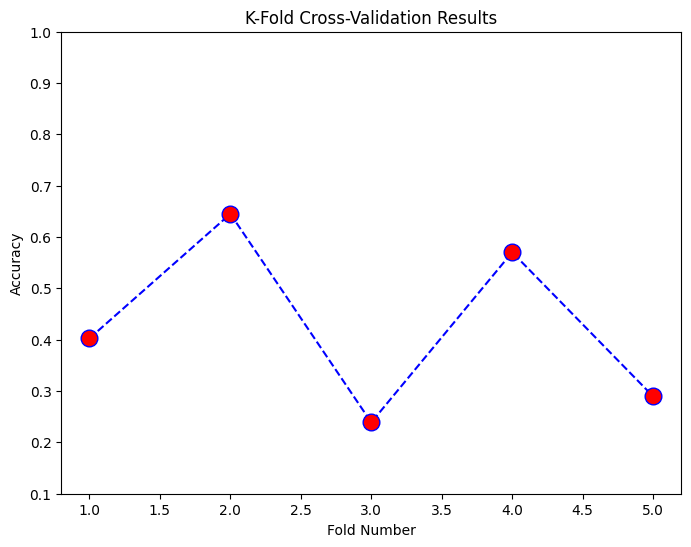

In [26]:
model_LotFrontage = predictions_num('LotFrontage', ['MasVnrType', 'FireplaceQu', 'LotFrontage', 'SalePrice'])

In [27]:
def predict_missing_values(df_missing, model, target_column, exclude_columns=[]):
    # Prepare encoded DataFrame
    df_encoded = df_missing.drop(exclude_columns + [target_column], axis=1, errors='ignore')

    # Label encode categorical columns
    le = LabelEncoder()
    for col in df_encoded.columns:
        if df_encoded[col].dtype != 'object':
            df_encoded[col] = le.fit_transform(df_encoded[[col]])
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = le.fit_transform(df_encoded[col])

    # Predict missing values
    features_to_predict = df_encoded.drop([target_column], axis=1, errors='ignore')
    y_pred = model.predict(features_to_predict)
    
    # Replace missing values in the original DataFrame
    df_missing[target_column] = y_pred

In [28]:
# Lets Predict

predict_missing_values(df_missing, model_MasVnrType, 'MasVnrType', exclude_columns=['FireplaceQu', 'LotFrontage', 'SalePrice'])
predict_missing_values(df_missing, model_FireplaceQu, 'FireplaceQu', exclude_columns=['MasVnrType', 'LotFrontage', 'SalePrice'])
predict_missing_values(df_missing, model_LotFrontage, 'LotFrontage', exclude_columns=['FireplaceQu', 'MasVnrType', 'SalePrice'])

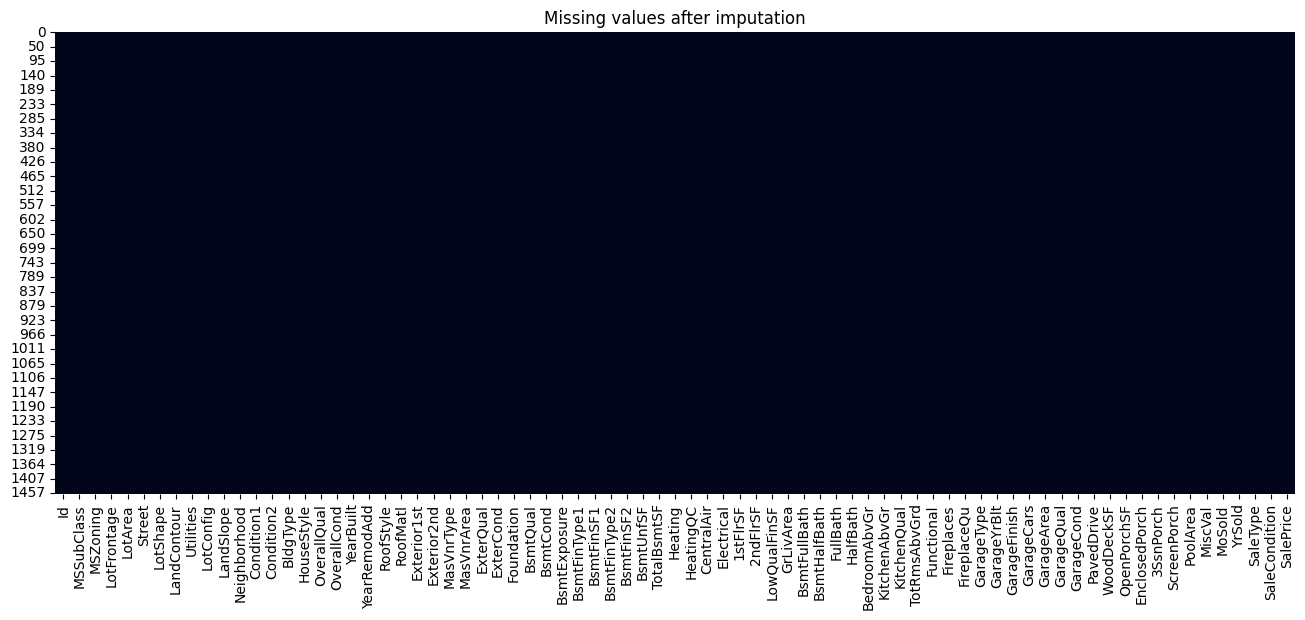

In [29]:
# create a heatmap for df_missing to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df_missing.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

In [30]:
# Concatenate the two dataframes
df_complete = pd.concat([df_missing, df_clean], axis=0)

# Shape of the Dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

df_complete.head()

The shape of the complete dataframe is:  (1460, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,226.44,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Stone,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,216.19,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Gd,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,4,70,RL,237.74,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,TA,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,6,50,RL,226.36,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,Stone,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Gd,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
7,8,60,RL,237.16,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Gd,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000


In [31]:
df = df_complete
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Distributing the data

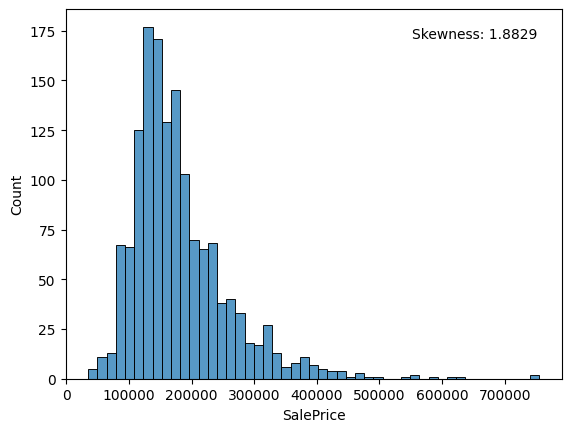

In [32]:
skewness = f"Skewness: {df['SalePrice'].skew():.4f}"

sns.histplot(df['SalePrice'])
plt.text(plt.xlim()[1] - 0.05 * plt.xlim()[1], plt.ylim()[1] - 0.05 * plt.ylim()[1], skewness, ha='right', va='top')
plt.show()

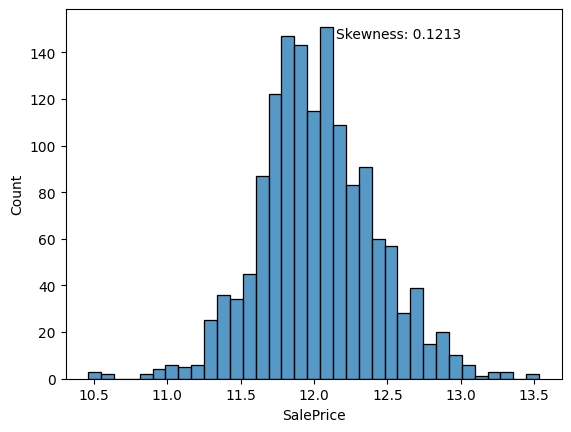

In [33]:
# Lets apply log on the SalePrice column to normalize the data
df['SalePrice'] = np.log(df['SalePrice'])

skewness_log = f"Skewness: {df['SalePrice'].skew():.4f}"

sns.histplot(df['SalePrice'])
plt.text(plt.xlim()[1] - 0.05 * plt.xlim()[1], plt.ylim()[1] - 0.05 * plt.ylim()[1], skewness_log, ha='right', va='top')
plt.show()

In [34]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

scaler = MinMaxScaler()
encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype != 'object':
        X[col] = scaler.fit_transform(X[[col]])
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
params = {'random_strength': 1,
 'n_estimators': 100,
 'max_depth': 7,
 'loss_function': 'RMSE',
 'learning_rate': 0.1,
 'colsample_bylevel': 0.8,
 'bootstrap_type': 'MVS',
 'bagging_temperature': 1.0}

model = CatBoostRegressor(**params)

In [37]:
model.fit(X_train, y_train)

0:	learn: 0.3739847	total: 61.9ms	remaining: 6.12s
1:	learn: 0.3519706	total: 69.6ms	remaining: 3.41s
2:	learn: 0.3318441	total: 72.3ms	remaining: 2.34s
3:	learn: 0.3117459	total: 78.8ms	remaining: 1.89s
4:	learn: 0.2942214	total: 86.2ms	remaining: 1.64s
5:	learn: 0.2798164	total: 92.2ms	remaining: 1.44s
6:	learn: 0.2637270	total: 98.8ms	remaining: 1.31s
7:	learn: 0.2518168	total: 105ms	remaining: 1.21s
8:	learn: 0.2397755	total: 112ms	remaining: 1.13s
9:	learn: 0.2293030	total: 117ms	remaining: 1.06s
10:	learn: 0.2203010	total: 125ms	remaining: 1.01s
11:	learn: 0.2110519	total: 130ms	remaining: 953ms
12:	learn: 0.2028992	total: 136ms	remaining: 912ms
13:	learn: 0.1949672	total: 142ms	remaining: 869ms
14:	learn: 0.1884079	total: 148ms	remaining: 837ms
15:	learn: 0.1826066	total: 153ms	remaining: 802ms
16:	learn: 0.1767342	total: 159ms	remaining: 776ms
17:	learn: 0.1716060	total: 164ms	remaining: 747ms
18:	learn: 0.1670042	total: 169ms	remaining: 722ms
19:	learn: 0.1630197	total: 175ms	

In [38]:
y_pred = model.predict(X_test)

MSE:  0.01501133911112773
MAE:  0.08283615811033454
R2:  0.9028431750876295
RMSE:  0.12252077012134609


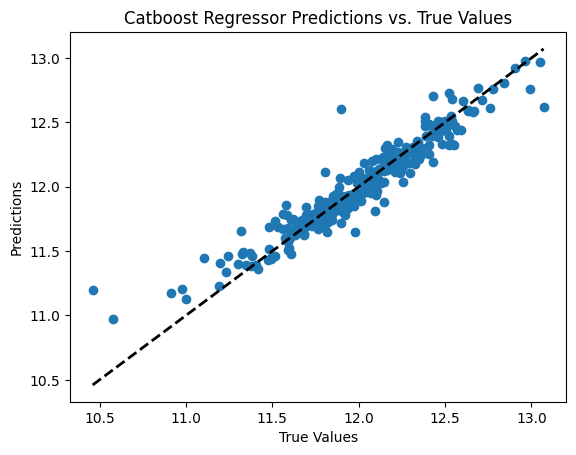

In [39]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Catboost Regressor Predictions vs. True Values")
plt.show()

## Final Prediction

In [40]:
df_test = df_test.drop(['PoolQC', 'MiscFeature','Alley', 'Fence' ], axis = 1)
(df_test.isnull().sum() / len(df) * 100).sort_values(ascending=False)

MasVnrType       61.232877
FireplaceQu      50.000000
LotFrontage      15.547945
GarageYrBlt       5.342466
GarageFinish      5.342466
GarageQual        5.342466
GarageCond        5.342466
GarageType        5.205479
BsmtCond          3.082192
BsmtQual          3.013699
BsmtExposure      3.013699
BsmtFinType1      2.876712
BsmtFinType2      2.876712
MasVnrArea        1.027397
MSZoning          0.273973
BsmtHalfBath      0.136986
Utilities         0.136986
Functional        0.136986
BsmtFullBath      0.136986
BsmtFinSF1        0.068493
BsmtFinSF2        0.068493
BsmtUnfSF         0.068493
TotalBsmtSF       0.068493
KitchenQual       0.068493
Exterior2nd       0.068493
Exterior1st       0.068493
GarageArea        0.068493
SaleType          0.068493
GarageCars        0.068493
MoSold            0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
YrSold            0.000000
PoolArea          0.000000
M

In [41]:
cols_1 = [col for col in df_test.columns if (df_test[col].isnull().sum() / len(df_test) * 100) < 10 and ((df_test[col].isnull().sum() / len(df_test) * 100) > 0)]
cols_1

for col in cols_1:
    if df_test[col].dtype != 'object':
        df_test[col] = imputer_num.fit_transform(df_test[[col]])
    else:
        df_test[col] = imputer_object.fit_transform(df_test[[col]]).squeeze()

In [42]:
(df_test.isnull().sum() / len(df) * 100).sort_values(ascending=False)

MasVnrType       61.232877
FireplaceQu      50.000000
LotFrontage      15.547945
HalfBath          0.000000
Fireplaces        0.000000
Functional        0.000000
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
Id                0.000000
GarageType        0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
1stFlrSF          0.000000
Electrical        0.000000
FullBath          0.000000
GarageYrBlt       0.000000
HeatingQC         0.000000
GarageFinish      0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
PavedDrive        0.000000
GarageCond        0.000000
GarageQual        0.000000
GarageArea        0.000000
G

In [43]:
def predict_missing_values(df_test, model, target_column, exclude_columns=[]):
    # Prepare encoded DataFrame
    df_encoded = df_test.drop(exclude_columns + [target_column], axis=1, errors='ignore')

    # Label encode categorical columns
    le = LabelEncoder()
    for col in df_encoded.columns:
        if df_encoded[col].dtype != 'object':
            df_encoded[col] = scaler.fit_transform(df_encoded[[col]])
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = le.fit_transform(df_encoded[col])

    # Predict missing values
    features_to_predict = df_encoded.drop([target_column], axis=1, errors='ignore')
    y_pred = model.predict(features_to_predict)
    
    # Replace missing values in the original DataFrame
    df_test[target_column] = y_pred

In [44]:
predict_missing_values(df_test, model_MasVnrType, 'MasVnrType', exclude_columns=['FireplaceQu', 'LotFrontage'])
predict_missing_values(df_test, model_FireplaceQu, 'FireplaceQu', exclude_columns=['MasVnrType', 'LotFrontage'])
predict_missing_values(df_test, model_LotFrontage, 'LotFrontage', exclude_columns=['FireplaceQu', 'MasVnrType'])

* Encoding and Scaling the data in df_test dataset

In [45]:
for col in df_test.columns:
        if df_test[col].dtype == 'object':
            df_test[col] = encoder.fit_transform(df_test[col])
        if df_test[col].dtype != 'object':
            df_test[col] = scaler.fit_transform(df_test[[col]]) 

In [46]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.000000,0.50,0.449986,0.184147,1.0,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.625954,0.183333,0.2,0.0,0.833333,0.857143,0.0,0.000000,1.000000,1.0,0.2,1.000000,1.0,1.0,0.8,0.116708,0.6,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.104309,0.000000,0.0,0.104309,0.0,0.0,0.25,0.0,0.333333,0.5,1.000000,0.166667,1.0,0.00,0.0,0.2,0.211538,1.0,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,1.0,0.8
1,0.000686,0.000000,0.75,0.544948,0.232124,1.0,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.603053,0.133333,0.6,0.0,0.916667,0.928571,0.0,0.083721,1.000000,1.0,0.2,1.000000,1.0,1.0,0.0,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.196672,0.000000,0.0,0.196672,0.0,0.0,0.25,0.5,0.500000,0.5,0.666667,0.250000,1.0,0.00,0.0,0.2,0.201923,1.0,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,1.0,0.8
2,0.001372,0.235294,0.75,0.427693,0.224197,1.0,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.900763,0.800000,0.2,0.0,0.833333,0.857143,0.0,0.000000,1.000000,1.0,0.4,0.666667,1.0,1.0,0.4,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.111135,0.376477,0.0,0.260666,0.0,0.0,0.50,0.5,0.500000,0.5,1.000000,0.250000,1.0,0.25,0.0,0.2,0.326923,0.0,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,1.0,0.8
3,0.002058,0.235294,0.75,0.401202,0.154326,1.0,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.625,0.908397,0.800000,0.2,0.0,0.833333,0.857143,0.0,0.015504,1.000000,1.0,0.4,1.000000,1.0,1.0,0.4,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.110708,0.364125,0.0,0.255333,0.0,0.0,0.50,0.5,0.500000,0.5,0.666667,0.333333,1.0,0.25,0.0,0.2,0.330128,0.0,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,1.0,0.8
4,0.002743,0.588235,0.75,0.103648,0.064121,1.0,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.777778,0.500,0.862595,0.700000,0.2,0.0,0.500000,0.428571,0.0,0.000000,0.666667,1.0,0.4,0.666667,1.0,1.0,0.0,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.186220,0.000000,0.0,0.186220,0.0,0.0,0.50,0.0,0.333333,0.5,0.666667,0.166667,1.0,0.00,0.0,0.2,0.310897,0.5,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,1.0,0.8


In [47]:
log_predictions = model.predict(df_test)

# Reverse the log transformation 
predictions_1 = np.exp(log_predictions)

In [48]:
predictions_1

array([136168.40848438, 178008.55951727, 207982.67613536, ...,
       183594.04695027, 139107.31983258, 259927.23009758])

In [49]:
submission['SalePrice'] = predictions_1
submission.to_csv('submission.csv', index = False)